In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from utils.engine import DDIMSampler
from utils.ema    import EMA
from model.UNet   import UNet

# 1) Point this to your trained checkpoint
#checkpoint_path = "checkpoint/gedi_treecover_v7.pth"
checkpoint_path = "checkpoint/gedi_lati.pth"

# 2) Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 3) Load checkpoint
cp = torch.load(checkpoint_path, map_location=device)

# 4) Instantiate model & load raw weights
model = UNet(**cp["config"]["Model"]).to(device)
model.load_state_dict(cp["model"])
model.eval()

# 5) Build EMA helper and inject saved shadow weights
#ema = EMA(model, decay=0.9999)
#ema.shadow = {k: v.to(device) for k, v in cp["ema_shadow"].items()}

# 6) Swap in EMA weights
#ema.store(model)    # backs up raw weights & copies EMA→model

# 7) Create sampler (will now use EMA-smoothed model)
guidance_scale = 1.5
sampler = DDIMSampler(
    model,
    guidance_scale=guidance_scale,
    **cp["config"]["Trainer"]
).to(device)

# 8) Sampling hyper-params
steps  = 100
eta    = 0.2
method = "quadratic"  # linear, quadratic

Sampling for condition -90.0...


100%|██████████| 100/100 [00:03<00:00, 28.27it/s, step=1, sample=1]


Sampling for condition -84.0...


100%|██████████| 100/100 [00:03<00:00, 30.29it/s, step=1, sample=1]


Sampling for condition -78.0...


100%|██████████| 100/100 [00:03<00:00, 30.28it/s, step=1, sample=1]


Sampling for condition -72.0...


100%|██████████| 100/100 [00:03<00:00, 30.32it/s, step=1, sample=1]


Sampling for condition -66.0...


100%|██████████| 100/100 [00:03<00:00, 30.31it/s, step=1, sample=1]


Sampling for condition -60.0...


100%|██████████| 100/100 [00:03<00:00, 30.32it/s, step=1, sample=1]


Sampling for condition -54.0...


100%|██████████| 100/100 [00:03<00:00, 30.32it/s, step=1, sample=1]


Sampling for condition -48.0...


100%|██████████| 100/100 [00:03<00:00, 30.31it/s, step=1, sample=1]


Sampling for condition -42.0...


100%|██████████| 100/100 [00:03<00:00, 30.31it/s, step=1, sample=1]


Sampling for condition -36.0...


100%|██████████| 100/100 [00:03<00:00, 30.33it/s, step=1, sample=1]


Sampling for condition -30.0...


100%|██████████| 100/100 [00:03<00:00, 30.31it/s, step=1, sample=1]


Sampling for condition -24.0...


100%|██████████| 100/100 [00:03<00:00, 30.30it/s, step=1, sample=1]


Sampling for condition -18.0...


100%|██████████| 100/100 [00:03<00:00, 30.32it/s, step=1, sample=1]


Sampling for condition -12.0...


100%|██████████| 100/100 [00:03<00:00, 30.31it/s, step=1, sample=1]


Sampling for condition -6.0...


100%|██████████| 100/100 [00:03<00:00, 30.28it/s, step=1, sample=1]


Sampling for condition 0.0...


100%|██████████| 100/100 [00:03<00:00, 30.26it/s, step=1, sample=1]


Sampling for condition 6.0...


100%|██████████| 100/100 [00:03<00:00, 30.29it/s, step=1, sample=1]


Sampling for condition 12.0...


100%|██████████| 100/100 [00:03<00:00, 30.27it/s, step=1, sample=1]


Sampling for condition 18.0...


100%|██████████| 100/100 [00:03<00:00, 30.28it/s, step=1, sample=1]


Sampling for condition 24.0...


100%|██████████| 100/100 [00:03<00:00, 30.26it/s, step=1, sample=1]


Sampling for condition 30.0...


100%|██████████| 100/100 [00:03<00:00, 30.28it/s, step=1, sample=1]


Sampling for condition 36.0...


100%|██████████| 100/100 [00:03<00:00, 30.27it/s, step=1, sample=1]


Sampling for condition 42.0...


100%|██████████| 100/100 [00:03<00:00, 30.29it/s, step=1, sample=1]


Sampling for condition 48.0...


100%|██████████| 100/100 [00:03<00:00, 30.27it/s, step=1, sample=1]


Sampling for condition 54.0...


100%|██████████| 100/100 [00:03<00:00, 30.27it/s, step=1, sample=1]


Sampling for condition 60.0...


100%|██████████| 100/100 [00:03<00:00, 30.27it/s, step=1, sample=1]


Sampling for condition 66.0...


100%|██████████| 100/100 [00:03<00:00, 30.28it/s, step=1, sample=1]


Sampling for condition 72.0...


100%|██████████| 100/100 [00:03<00:00, 30.27it/s, step=1, sample=1]


Sampling for condition 78.0...


100%|██████████| 100/100 [00:03<00:00, 30.27it/s, step=1, sample=1]


Sampling for condition 84.0...


100%|██████████| 100/100 [00:03<00:00, 30.28it/s, step=1, sample=1]


Sampling for condition 90.0...


100%|██████████| 100/100 [00:03<00:00, 30.26it/s, step=1, sample=1]


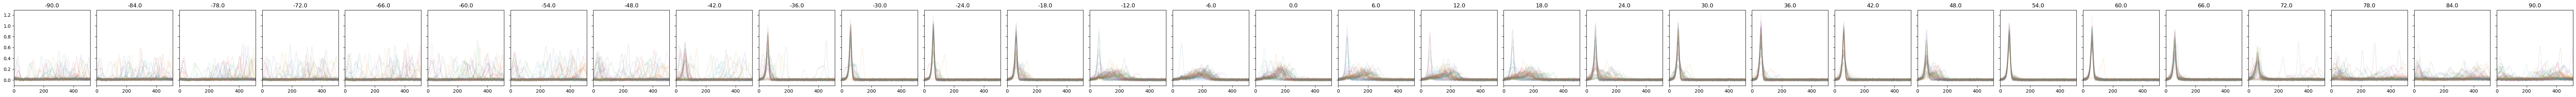

In [2]:
from torch.amp import autocast

# 1) Define condition grid (0.0 → 1.0 in steps of 0.1)
#cond_values = np.round(np.linspace(0.0, 100, 11), 2)
#cond_values = np.round(np.linspace(-20, 5, 6), 1)
#cond_values = np.round(np.linspace(35, 50, 4), 1)
cond_values = np.round(np.linspace(-90, 90, 31), 2)


# 2) Batch size & storage dict
batch_size     = 50
waveform_dict  = {}

# 3) Prepare plotting grid
fig, axes = plt.subplots(
    nrows=1, ncols=len(cond_values),
    figsize=(len(cond_values)*2.5, 3),
    sharey=True
)
x_axis = np.arange(512)  # waveform length
z_t    = torch.randn((batch_size, cp["config"]["Model"]["in_channels"], 512),
                     device=device) 


# 4) Loop through each condition with mixed precision
for i, cond in enumerate(cond_values):
    print(f"Sampling for condition {cond:.1f}...")
    cond_tensor = torch.full((batch_size, 1), cond,
                             dtype=torch.float, device=device)
    
    # run sampler under autocast for mixed precision
    with autocast('cuda', dtype=torch.bfloat16):
        x = sampler(
            z_t, cond=cond_tensor,
            only_return_x_0=True,
            steps=steps, eta=eta,
            method=method
        )

    # x: [B, 1, 512] → to numpy & squeeze channel
    waveforms = x.cpu().numpy().squeeze(1)  # (batch_size, 512)
    waveforms = np.flip(waveforms, axis=-1)
    waveform_dict[cond] = waveforms

    # plot stacked waveforms
    ax = axes[i]
    for wf in waveforms:
        ax.plot(x_axis, wf, alpha=0.1)
    ax.set_title(f"{cond:.1f}")
    ax.set_xlim(0, 511)

plt.tight_layout()
plt.show()


In [3]:
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, SelectionSlider

# Ensure waveform_dict is in memory;
# if starting fresh, load it:
# import pickle
# with open("waveform_dict.pkl","rb") as f:
#     waveform_dict = pickle.load(f)

conds = sorted(waveform_dict.keys())

def plot_for_cond(cond):
    wfs = waveform_dict[cond]  # shape (batch_size, 512)
    x  = np.arange(wfs.shape[1])
    plt.figure(figsize=(6, 4))
    for wf in wfs:
        plt.plot(x, wf, alpha=0.1)
    plt.title(f"Tree-cover = {cond:.1f}")
    plt.xlim(0, wfs.shape[1] - 1)
    plt.ylim(0, 1.2)
    plt.show()

slider = SelectionSlider(
    options=[float(c) for c in conds],
    description="Tree-cover",
    continuous_update=True
)
interact(plot_for_cond, cond=slider)


interactive(children=(SelectionSlider(description='Tree-cover', options=(-90.0, -84.0, -78.0, -72.0, -66.0, -6…

<function __main__.plot_for_cond(cond)>

In [5]:
import pickle

with open("waveform_dict.pkl", "wb") as f:
    pickle.dump(waveform_dict, f)
print("Saved all waveforms → waveform_dict.pkl")


Saved all waveforms → waveform_dict.pkl


In [6]:
import imageio

images = []
for cond in conds:
    wfs = waveform_dict[cond]
    fig, ax = plt.subplots(figsize=(6, 4))
    for wf in wfs:
        ax.plot(x_axis, wf, alpha=0.1)
    ax.set_title(f"Latitude = {cond:.2f}")
    ax.set_xlim(0, wfs.shape[1] - 1)
    ax.set_ylim(0, 1.2)
    fig.canvas.draw()
    # get RGBA buffer from the Agg canvas and drop alpha
    buf = fig.canvas.buffer_rgba()
    img = np.asarray(buf)[:, :, :3]
    img = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    images.append(img)
    plt.close(fig)

imageio.mimsave(f"waveforms_v7_w{guidance_scale}_eta{eta}.gif", images, fps=4)
print("Saved animated GIF → waveforms.gif")

Saved animated GIF → waveforms.gif


In [7]:
import pandas as pd

# load the dataframe from the pickle file
df = pd.read_pickle("data/gedi/combined_df_test.pkl")

# randomly sample 5 rows (adjust the column name if necessary)
sampled_waveforms = df.sample(5)

sampled_waveforms

,rh,dataset,rx_sample_start_index,rx_sample_count,geolocation/latitude_bin0,geolocation/longitude_bin0,geolocation/elevation_bin0,geolocation/elevation_lastbin,geolocation/delta_time,shot_number,...,land_cover_data/modis_nonvegetated,land_cover_data/modis_treecover,delta_time,rh_0,rh_25,rh_50,rh_75,rh_98,surface_flag,y_normalized
2589113,"[-5.35, -4.64, -4.15, -3.78, -3.51, -3.29, -3....",na_115,80059601.0,753.0,36.938905,-112.460690,1496.544850,1383.964556,6.395727e+07,6.121060e+16,...,68.0,0.0,6.395727e+07,-5.35,-1.38,-0.26,0.710000,2.50,1.0,"[0.0027417974, 0.0027417974, 0.0027417974, 0.0..."
2752743,"[-6.03, -5.09, -4.49, -4.04, -3.7, -3.44, -3.2...",na_115,69624021.0,801.0,36.972851,-111.862251,1605.606303,1485.720686,8.869181e+07,1.055908e+17,...,68.0,0.0,8.869181e+07,-6.03,-1.31,-0.07,1.080000,5.54,1.0,"[0.0032802464, 0.0032802464, 0.0032802464, 0.0..."
548079,"[-6.22, -5.74, -5.22, -4.66, -3.91, -3.02, -2....",amazon,6256521.0,852.0,-1.324257,-62.768713,99.358319,-27.580144,1.233943e+08,1.678408e+17,...,12.0,78.0,1.233943e+08,-6.22,4.51,9.21,13.980000,21.40,1.0,"[0.023283463, 0.023283463, 0.023283463, 0.0232..."
2971489,"[-5.41, -4.78, -4.29, -3.92, -3.62, -3.36, -3....",na_115,80691501.0,756.0,41.833846,-112.162242,1372.641272,1259.810296,1.333398e+08,1.856908e+17,...,36.0,1.0,1.333398e+08,-5.41,-1.38,-0.26,0.780000,2.61,1.0,"[0.005587629, 0.005587629, 0.005587629, 0.0055..."
376842,"[-3.52, -2.5, -1.68, -1.08, -0.63, -0.29, 0.0,...",amazon,233460781.0,909.0,1.605460,-64.753473,650.377126,514.312683,9.797922e+07,1.222508e+17,...,3.0,75.0,9.797922e+07,-3.52,8.01,16.18,22.290001,27.42,1.0,"[0.002569899, 0.0033166474, 0.0052432623, 0.00..."


In [8]:
condition_columns = np.array([
            'geolocation/latitude_bin0',            # 0 y
            'geolocation/longitude_bin0',           # 1 
            'geolocation/elevation_bin0',           # 2 
            'land_cover_data/landsat_treecover',    # 3
            'land_cover_data/modis_nonvegetated',   # 4
            'land_cover_data/modis_treecover'       # 5 y
        ])
selected_columns = list(condition_columns) + ['y_normalized']

In [9]:
samp_df = sampled_waveforms[selected_columns]
samp_df

,geolocation/latitude_bin0,geolocation/longitude_bin0,geolocation/elevation_bin0,land_cover_data/landsat_treecover,land_cover_data/modis_nonvegetated,land_cover_data/modis_treecover,y_normalized
2589113,36.938905,-112.460690,1496.544850,0.0,68.0,0.0,"[0.0027417974, 0.0027417974, 0.0027417974, 0.0..."
2752743,36.972851,-111.862251,1605.606303,0.0,68.0,0.0,"[0.0032802464, 0.0032802464, 0.0032802464, 0.0..."
548079,-1.324257,-62.768713,99.358319,100.0,12.0,78.0,"[0.023283463, 0.023283463, 0.023283463, 0.0232..."
2971489,41.833846,-112.162242,1372.641272,0.0,36.0,1.0,"[0.005587629, 0.005587629, 0.005587629, 0.0055..."
376842,1.605460,-64.753473,650.377126,100.0,3.0,75.0,"[0.002569899, 0.0033166474, 0.0052432623, 0.00..."


In [10]:
selected_row = samp_df.iloc[1]
selected_row

geolocation/latitude_bin0                                                     36.972851
geolocation/longitude_bin0                                                  -111.862251
geolocation/elevation_bin0                                                  1605.606303
land_cover_data/landsat_treecover                                                   0.0
land_cover_data/modis_nonvegetated                                                 68.0
land_cover_data/modis_treecover                                                     0.0
y_normalized                          [0.0032802464, 0.0032802464, 0.0032802464, 0.0...
Name: 2752743, dtype: object

In [11]:
selected_wf = selected_row['y_normalized']
print(selected_wf)

[3.28024640e-03 3.28024640e-03 3.28024640e-03 3.28024640e-03
 3.28024640e-03 3.28024640e-03 3.28024640e-03 3.28024640e-03
 3.28024640e-03 3.28024640e-03 3.28024640e-03 3.28024640e-03
 3.28024640e-03 3.28024640e-03 3.28024640e-03 3.28024640e-03
 3.28024640e-03 3.28024640e-03 3.28024640e-03 3.28024640e-03
 3.28024640e-03 3.28024640e-03 3.28024640e-03 3.28024640e-03
 3.28024640e-03 3.28024640e-03 3.28024640e-03 3.28024640e-03
 3.28024640e-03 3.28024640e-03 3.28024640e-03 3.28024640e-03
 3.28024640e-03 3.28024640e-03 3.28024640e-03 3.28024640e-03
 3.28024640e-03 3.28024640e-03 3.28024640e-03 3.28024640e-03
 3.28024640e-03 3.28024640e-03 3.28024640e-03 3.28024640e-03
 3.28024640e-03 3.28024640e-03 3.28024640e-03 3.28024640e-03
 3.28024640e-03 3.28024640e-03 3.28024640e-03 3.28024640e-03
 3.28024640e-03 3.28024640e-03 3.28024640e-03 3.28024640e-03
 3.28024640e-03 3.28024640e-03 3.28024640e-03 3.28024640e-03
 3.28024640e-03 3.28024640e-03 3.28024640e-03 3.28024640e-03
 3.28024640e-03 3.280246

In [12]:
# Convert an existing waveform (wf: shape (512,)) to a tensor with shape [1, 1, 512]
wf_tensor = torch.tensor(selected_wf, dtype=torch.float, device=device).unsqueeze(0).unsqueeze(0)

# --- Forward diffusion: add noise in a controlled manner ---
steps = 1000
t_step = steps // 2
alpha_bar = 1.0 - (t_step / steps)
alpha_bar_t = torch.tensor(alpha_bar, dtype=torch.float, device=device)  # converted to torch tensor

noise = torch.randn_like(wf_tensor)
# Forward process: x_noisy = sqrt(alpha_bar)*original + sqrt(1-alpha_bar)*noise
x_noisy = torch.sqrt(alpha_bar_t) * wf_tensor + torch.sqrt(1 - alpha_bar_t) * noise

# --- Backward (denoising) diffusion: generate a new waveform with a changed condition ---
# For example, modify the conditioning value (here we add 10 to the current slider value)
original_cond = selected_row['land_cover_data/modis_treecover']
new_cond = original_cond - 30.0
print(f"Original condition: {original_cond}, New condition: {new_cond}")
cond_tensor_new = torch.full((1, 1), new_cond, dtype=torch.float, device=device)


Original condition: 0.0, New condition: -30.0


100%|██████████| 1000/1000 [00:17<00:00, 58.27it/s, step=1, sample=1] 


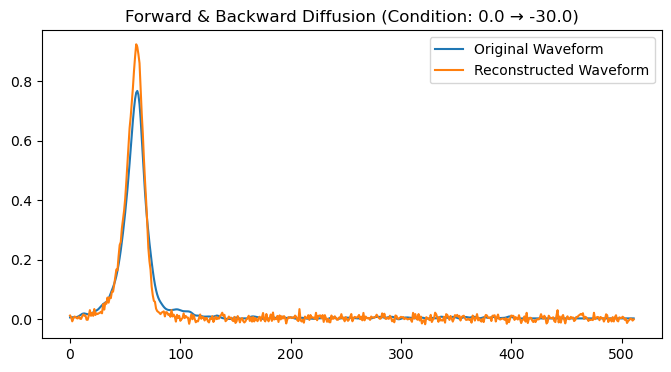

In [13]:

with autocast("cuda", dtype=torch.bfloat16):
    x_reconstructed = sampler(
        x_noisy, cond=cond_tensor_new,
        
        only_return_x_0=True, steps=steps, eta=eta, method=method
    )

# Plot the original and reconstructed waveforms for comparison
original_wf = wf_tensor.squeeze().cpu().numpy()
x_reconstructed = x_reconstructed.squeeze().cpu().numpy()
original_wf = np.flip(original_wf, axis=-1)
x_reconstructed = np.flip(x_reconstructed, axis=-1)
plt.figure(figsize=(8, 4))
plt.plot(x_axis, original_wf, label="Original Waveform")
plt.plot(x_axis, x_reconstructed, label="Reconstructed Waveform")
plt.title(f"Forward & Backward Diffusion (Condition: {original_cond} → {new_cond})")
plt.legend()
plt.show()
